In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import pandas as pd
import operator
import networkx as nx
import math
from tqdm import tqdm
import math
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
returns_df=pd.read_csv("returns.csv")
correlations = returns_df.corr()

In [3]:
returns_array = returns_df.loc[:, ~returns_df.columns.str.contains('^Unnamed')].as_matrix()
returns_array

array([[ 0.00539085, -0.01677579, -0.01036279, ...,  0.00214516,
        -0.03428907, -0.00232648],
       [-0.01808368,  0.00187793,  0.        , ...,  0.006408  ,
        -0.07232066, -0.00584   ],
       [ 0.00060809, -0.0441107 ,  0.        , ..., -0.01862518,
        -0.05129329, -0.01534557],
       ..., 
       [ 0.        ,  0.00479617,  0.        , ...,  0.00113507,
         0.02857337, -0.00411354],
       [-0.00164842,  0.        , -0.00623055, ..., -0.00454805,
        -0.05798726,  0.01513631],
       [ 0.00047125,  0.00477328,  0.        , ...,  0.        ,
         0.05798726,  0.01391011]])

In [4]:
def calculate_statistic(pearson_corr, n):
    return np.abs(pearson_corr*np.sqrt(n-2)/np.sqrt(1-pearson_corr**2))

In [5]:
def check_struct(struct, true_struct):
    Y1=0
    Y2=0
    for e in struct.edges():
        if not true_struct.has_edge(e[0],e[1]):
            Y1+=1
    for e in true_struct.edges():
        if not struct.has_edge(e[0],e[1]):
            Y2+=1
    return (Y1, Y2)

In [6]:
def make_MG(sample):
    corr = np.corrcoef(sample)
    alpha = 0.05
    mg = nx.Graph()
    n = len(corr)
    treshold = t.ppf(1-alpha, df=n-2, scale = (n-2)/(n-4))
    for i in range(0,n):
        for j in range (i+1,n):
            if calculate_statistic(corr[i][j], n) > treshold:
                mg.add_edge(i,j, weight=corr[i][j])
    return mg

In [7]:
alpha = 0.05
True_MG = nx.Graph()
n = len(correlations)
treshold = t.ppf(1-alpha, df=n-2, scale = (n-2)/(n-4))
for i in range(0,n):
    for j in range (i+1,n):
        if calculate_statistic(correlations[correlations.index[i]][j], n) > treshold:
            True_MG.add_edge(i,j, weight=correlations[correlations.index[i]][j])
N = n

In [8]:
sizes = np.concatenate((np.arange(10,100,10)\
                        , np.arange(100,1000,100)\
                        , np.arange(1000,10000,1000)\
                        , np.arange(10000,60000,10000))\
                        , axis = 0)

In [9]:
# %%time
# errors_mg = []
# true_cov_mtr = np.cov(returns_array.T)
# means = [0.] * N
# samples_number = 50
# for size in sizes:
#     print("size: ", size)
#     err_mg = 0
#     for i in range(0,samples_number):
#         sample = np.random.multivariate_normal(means, true_cov_mtr, size).T
        
#         M2 = len(True_MG.edges())
#         M1 = N*(N-1)/2 - M2
#         errors = check_struct(make_MG(sample), True_MG)
#         err_mg += 0.5* (errors[0]/M1 + errors[1]/M2)


#     errors_mg.append(err_mg/samples_number)

In [10]:
def step_down(stats, alpha):
    hypotheses =  [True] * len(stats)
    critical_values = [float("inf")] * len(stats)
    sorted_stats = sorted(enumerate(stats), key=lambda x:x[1], reverse=True)
    k=1
    for index, stat in sorted_stats:
        critical_values[index] = norm.ppf(np.power(1-alpha,k))
        if stat>critical_values[index]:
            hypotheses[index]=False
        else:
            break
        k=k+1
    return hypotheses, critical_values

In [11]:
returns_df.mean()

AKRN     0.000971
AMEZ    -0.001013
AVAN    -0.000041
AVAZ     0.001036
BSPB    -0.000419
CHMF     0.000204
CLSB    -0.000932
CLSBP    0.000289
ELTZ    -0.000174
IGSTP   -0.001182
IRKT     0.001305
ISKJ    -0.002136
KBSB    -0.000706
KROTP   -0.000992
KUBE    -0.000939
LNTA    -0.000677
LNZLP   -0.001308
MAGE    -0.001103
MAGEP   -0.000483
MFGS    -0.002149
MRKC    -0.000361
MRKP     0.003024
MRKU     0.001526
MRKZ     0.000067
MVID     0.000232
NFAZ     0.000946
NKHP     0.001107
NNSB     0.000749
PHOR    -0.000179
PLSM    -0.001616
RASP     0.001817
RKKE    -0.000487
ROLO     0.001140
ROST    -0.000642
RTKM    -0.000521
SAGOP   -0.000797
SBERP    0.002306
SIBG    -0.002773
SIBN     0.001550
SNGS    -0.000128
SNGSP   -0.000473
TNSE    -0.000649
URKZ     0.001773
UTAR    -0.000716
UWGN    -0.000112
VGSBP   -0.001305
VRSBP   -0.001263
VSMO     0.000913
VTRS    -0.003676
YNDX     0.002639
dtype: float64

In [12]:
returns_df.cov()

,AKRN,AMEZ,AVAN,AVAZ,BSPB,CHMF,CLSB,CLSBP,ELTZ,IGSTP,...,SNGSP,TNSE,URKZ,UTAR,UWGN,VGSBP,VRSBP,VSMO,VTRS,YNDX
AKRN,1.396262e-04,1.105901e-05,0.000033,-1.273544e-06,0.000007,0.000042,-1.633879e-05,-2.856977e-05,-9.333602e-06,-1.084526e-05,...,2.559384e-05,2.463171e-06,0.000007,7.203647e-06,-8.483231e-06,-7.128561e-06,-1.260698e-05,1.351562e-05,-0.000019,2.024292e-05
AMEZ,1.105901e-05,4.136148e-04,0.000091,1.923724e-05,0.000032,0.000044,1.168789e-05,3.093134e-05,1.326209e-05,-5.237033e-05,...,2.194815e-05,1.158807e-05,0.000036,1.894499e-05,1.088641e-05,-1.057140e-05,7.940851e-05,7.226414e-07,0.000075,4.586941e-05
AVAN,3.251203e-05,9.132463e-05,0.003051,1.114013e-04,-0.000002,0.000025,-2.141434e-04,-4.555543e-05,3.155021e-05,6.064943e-05,...,-2.348004e-05,-8.668817e-06,-0.000074,-4.190479e-06,-3.802402e-05,-3.756445e-05,-3.369171e-05,2.878531e-06,0.000056,-1.036252e-04
AVAZ,-1.273544e-06,1.923724e-05,0.000111,3.012368e-04,0.000011,0.000020,3.446263e-05,2.025369e-05,9.759712e-06,7.790726e-06,...,1.014195e-05,-8.606266e-06,-0.000018,-5.808252e-06,9.685955e-07,-1.257617e-05,-2.151190e-05,-2.895444e-06,-0.000141,1.061255e-05
BSPB,6.856000e-06,3.206694e-05,-0.000002,1.117833e-05,0.000205,0.000045,-4.238203e-06,4.681967e-05,3.454969e-05,-2.452905e-05,...,3.318958e-05,1.598532e-05,0.000041,4.198612e-06,-5.352692e-06,-6.789573e-06,-3.498395e-05,2.482967e-05,0.000103,2.144156e-05
CHMF,4.199178e-05,4.449391e-05,0.000025,1.968939e-05,0.000045,0.000210,4.275999e-05,-4.852526e-06,1.172982e-05,-3.692964e-05,...,4.865090e-05,-1.504001e-05,0.000012,1.891740e-05,-9.359954e-06,-6.798083e-06,-2.576942e-05,2.201792e-05,0.000173,4.131854e-05
CLSB,-1.633879e-05,1.168789e-05,-0.000214,3.446263e-05,-0.000004,0.000043,8.162978e-04,3.873408e-04,3.434124e-05,-1.578315e-05,...,4.537510e-05,3.780263e-05,0.000065,-1.195804e-05,1.724113e-05,3.964726e-05,-1.024931e-04,3.273445e-05,0.000199,2.791156e-05
CLSBP,-2.856977e-05,3.093134e-05,-0.000046,2.025369e-05,0.000047,-0.000005,3.873408e-04,1.063716e-03,1.243356e-05,-1.347969e-04,...,5.522799e-06,5.644662e-05,0.000006,1.785981e-05,7.643186e-06,-4.878017e-05,1.492483e-05,-2.333743e-05,0.000152,-3.516256e-05
ELTZ,-9.333602e-06,1.326209e-05,0.000032,9.759712e-06,0.000035,0.000012,3.434124e-05,1.243356e-05,2.340460e-04,5.449118e-06,...,-5.772413e-07,2.955328e-06,0.000039,-6.665108e-06,9.666048e-06,-1.345635e-05,3.000255e-05,4.572329e-05,-0.000008,-5.290576e-06
IGSTP,-1.084526e-05,-5.237033e-05,0.000061,7.790726e-06,-0.000025,-0.000037,-1.578315e-05,-1.347969e-04,5.449118e-06,5.847826e-04,...,-7.811279e-07,-3.023770e-05,0.000003,3.780821e-05,-1.010441e-06,1.141021e-04,2.628874e-05,6.733011e-06,0.000067,1.269184e-07


In [13]:
statistics = [returns_df[column].sum() for column in returns_df]
statistics = statistics[1:]
n = returns_df.shape[0]

stds = returns_df.describe().loc['std'].tolist()
stds = [x*np.sqrt(n) for x in stds]
normalized_statistics = []
for i in range(0, len(statistics)):
    normalized_statistics.append(statistics[i]/stds[i])

In [14]:
normalized_statistics

[1.2993932926209713,
 -0.78729023294958889,
 -0.011866345779172567,
 0.94347744342711426,
 -0.46286294757831248,
 0.22254507253896785,
 -0.51576735848235333,
 0.14004381112345415,
 -0.17962647008360649,
 -0.77262168301193201,
 0.90353570219354296,
 -1.2392908924437844,
 -0.37106486160817054,
 -0.35084100327532824,
 -0.78077908677060337,
 -0.71873879866990054,
 -1.389263769784457,
 -0.72699947741726156,
 -0.24797671989316125,
 -1.8064149075164024,
 -0.26257450587198905,
 2.2616976009080569,
 1.2374189546735632,
 0.048366215429550843,
 0.25244793203725197,
 0.45163249359686125,
 0.74908803158243065,
 0.22744843281839239,
 -0.24750650373959016,
 -0.69320527991880221,
 1.3387298836832791,
 -0.4321334654949025,
 0.66659666921940508,
 -0.35527723284056717,
 -0.79227130252513223,
 -0.38462443270802305,
 2.1461202596340372,
 -0.96871151036663083,
 1.991562874063534,
 -0.12474264249550211,
 -0.51401852494289446,
 -0.99694170525666159,
 1.4732646688355888,
 -0.73244306543615512,
 -0.138959870110

In [15]:
del returns_df['Unnamed: 0']

In [16]:
def trueNet(df, m0):
    return [x <= m0 for x in df.mean()]

In [17]:
def holm(df, m0, alpha, cov):
    cols = df.columns
    statistics = [math.sqrt(len(df.index))*(df.mean()[c] - m0) / math.sqrt(cov[c][c]) for c in cols]
    pos = range(len(statistics))
    statPos = zip(statistics, pos)
    sortedStat = sorted(statPos, key=lambda x:x[0], reverse=True)
    net = [True for x in statistics]
    i=0
    for stat, pos in sortedStat:
        if stat > norm.ppf(1 - alpha / (len(statistics) - i)):
            net[pos]=False
        else:
            break
        i+=1
    return net

In [18]:
def cmpStruct(true, obs):
    m1 = 0
    m2 = 0
    for i in range(len(true)):
        if (true[i] == True and obs[i] == False):
            m1+=1
        elif (true[i] == False and obs[i] == True):
            m2+=1
    return (m1, m2)

In [19]:
def knownInfo(dfMeans, indexesOfMeansToTest, knownMeans, indexesOfKnownMeans, m0, alpha, cov, n): # n - number of obs, knownMeans has size of dfMeans, but uses only indexesOfKnownMeans
    inverseCov = sp.linalg.inv(cov)
    statistics = []
    for i in indexesOfMeansToTest:
        s = 0
        for j in indexesOfKnownMeans:
            s+= inverseCov[i][j]*(dfMeans[j] - knownMeans[j])
        statistics.append(math.sqrt(n)* (dfMeans[i] - m0 + s/inverseCov[i][i]) / math.sqrt(cov.iloc[i][i])) 
    pos = range(len(indexesOfMeansToTest))
    statPos = zip(statistics, pos)
    sortedStat = sorted(statPos, key=lambda x:x[0], reverse=True)
    net = [True for x in statistics]
    i=0
    for stat, pos in sortedStat:
        if stat > norm.ppf(1 - alpha / (len(statistics) - i)):
            net[pos] = False
        else:
            break
        i+=1
    return net    

In [20]:
knownInfo(returns_df.mean(), [0,1], returns_df.mean(), [item for item in range(len(returns_df.mean())) if item not in [0,1]], 0, 0.01, returns_df.cov(), len(returns_df.index))

[True, True]

In [21]:
def my(df, indexesOfMeansToTest, trustedMeans, trustedIndexes, givenMeans, m0, alpha1, alpha2, cov):
    # trusted - means sure, given - are given wtih an error
    inverseCov = sp.linalg.inv(cov)
    givenIndexes = [item for item in range(len(df.columns)) if ((item not in indexesOfMeansToTest) and (item not in trustedIndexes))]
    statistics = []
    n = len(df.index)
    trustedIndexes = list(trustedIndexes)
    for i in givenIndexes:
        s = 0
        for j in trustedIndexes:
            s+= inverseCov[i][j]*(df.mean().iloc[j] - trustedMeans[j])
        statistics.append(math.sqrt(n)* (df.mean().iloc[i] - givenMeans[i] + s/inverseCov[i][i]) / math.sqrt(cov.iloc[i][i])) 
    pos = givenIndexes
    statPos = zip(statistics, pos)
    sortedStat = sorted(statPos, key=lambda x:x[0], reverse=True)
    canBeTrusted = givenIndexes[:]
    i=0
    for stat, pos in sortedStat:
        if ((stat > norm.ppf(1 - alpha1 / (len(statistics) - i) / 2)) or (stat < norm.ppf(alpha1 / (len(statistics) - i) / 2))):
            canBeTrusted.remove(pos)
        else:
            break
        i+=1
        
    for l in canBeTrusted:
        trustedIndexes.append(l)
        trustedMeans[l] = givenMeans[l]
    
    return knownInfo(df.mean(), indexesOfMeansToTest, trustedMeans, trustedIndexes, m0, alpha2, cov, len(df.index))    

In [22]:
my(returns_df, [0, 1], [0,0,0,0,0], [2,3,4], range(len(returns_df.columns)), 0.01, 0.05, 0.05, returns_df.cov())

[True, True]

100%|██████████| 40/40 [53:06<00:00, 79.66s/it]


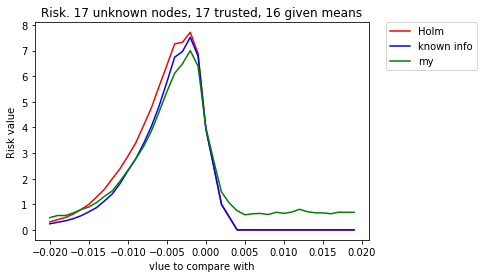

In [23]:
n = 1000 # число генераций
alpha = 0.05
m0s = np.arange(-0.02, 0.02, 0.001)
m1s = []
m2s = []
risks = []
knownMRisks = []
myRisks = []
for m0 in tqdm(m0s):
    s1 = s2 = 0
    knownMSum = 0
    mySum = 0
    trueMask = trueNet(returns_df, m0)
    for i in range(n):
        samples = np.random.multivariate_normal(returns_df.mean(), returns_df.cov(), 60)
        samplesDF = pd.DataFrame(samples)
        samplesDF.columns = returns_df.columns
        m1, m2 = cmpStruct(trueMask[0:50:3], holm(samplesDF, m0, alpha, returns_df.cov())[0:50:3])
        s1+=m1*0.5
        s2+=m2*0.5
        km1, km2 = cmpStruct(trueMask[0:50:3], knownInfo(samplesDF.mean(), range(0,50, 3), returns_df.mean(), range(1,50, 3), m0, alpha, returns_df.cov(), len(samplesDF.index)))
        knownMSum+=km1*0.5 + km2*0.5
        
        givenMeans = pd.DataFrame(list(np.random.uniform(low=-1, high=1.0, size=50))).T.mean()
        givenMeans.columns = returns_df.columns
        
        my1, my2 = cmpStruct(trueMask[0:50:3], 
my(samplesDF, range(0,50, 3), returns_df.mean(), range(1,50, 3), givenMeans, m0, alpha, alpha, returns_df.cov()))
        mySum+=my1*0.5 + my2*0.5
        
    s1/=n
    s2/=n
    m1s.append(s1)
    m2s.append(s2)
    risks.append(s1 + s2)
    knownMRisks.append(knownMSum/n)
    myRisks.append(mySum/n)
    
plt.title('Risk. 17 unknown nodes, 17 trusted, 16 given means')
plt.plot(m0s, risks, 'r', label = "Holm")
plt.plot(m0s, knownMRisks, 'b', label = "known info")
plt.xlabel('vlue to compare with')
plt.ylabel('Risk value')
plt.plot(m0s, myRisks, 'g', label = "my")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

100%|██████████| 40/40 [34:54<00:00, 52.37s/it]


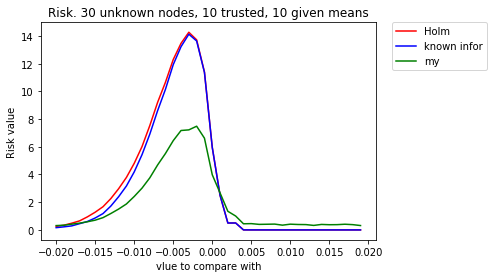

In [24]:
n = 1000 # число генераций
alpha = 0.05
m0s = np.arange(-0.02, 0.02, 0.001)
m1s = []
m2s = []
risks = []
knownMRisks = []
myRisks = []
for m0 in tqdm(m0s):
    s1 = s2 = 0
    knownMSum = 0
    mySum = 0
    trueMask = trueNet(returns_df, m0)
    for i in range(n):
        samples = np.random.multivariate_normal(returns_df.mean(), returns_df.cov(), 60)
        samplesDF = pd.DataFrame(samples)
        samplesDF.columns = returns_df.columns
        m1, m2 = cmpStruct(trueMask[0:30], holm(samplesDF, m0, alpha, returns_df.cov())[0:30])
        s1+=m1*0.5
        s2+=m2*0.5
        km1, km2 = cmpStruct(trueMask[0:30], knownInfo(samplesDF.mean(), range(0,30), returns_df.mean(), range(30,40), m0, alpha, returns_df.cov(), len(samplesDF.index)))
        knownMSum+=km1*0.5 + km2*0.5
        
        givenMeans = np.random.uniform(low=-1, high=1.0, size=50)
        
        my1, my2 = cmpStruct(trueMask[0:50:3], 
my(samplesDF, range(0,30), returns_df.mean(), range(30,40), givenMeans, m0, alpha, alpha, returns_df.cov()))
        mySum+=my1*0.5 + my2*0.5
        
    s1/=n
    s2/=n
    m1s.append(s1)
    m2s.append(s2)
    risks.append(s1 + s2)
    knownMRisks.append(knownMSum/n)
    myRisks.append(mySum/n)
    
plt.title('Risk. 30 unknown nodes, 10 trusted, 10 given means')
plt.plot(m0s, risks, 'r', label = "Holm")
plt.plot(m0s, knownMRisks, 'b', label = "known infor")
plt.xlabel('vlue to compare with')
plt.ylabel('Risk value')
plt.plot(m0s, myRisks, 'g', label = "my")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

100%|██████████| 40/40 [53:22<00:00, 80.06s/it]


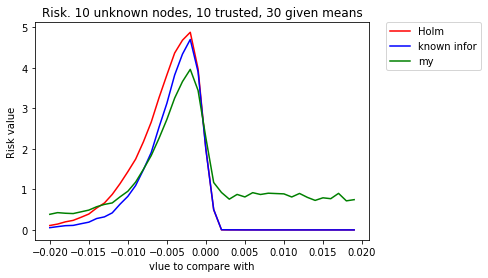

In [25]:
n = 1000 # число генераций
alpha = 0.05
m0s = np.arange(-0.02, 0.02, 0.001)
m1s = []
m2s = []
risks = []
knownMRisks = []
myRisks = []
for m0 in tqdm(m0s):
    s1 = s2 = 0
    knownMSum = 0
    mySum = 0
    trueMask = trueNet(returns_df, m0)
    for i in range(n):
        samples = np.random.multivariate_normal(returns_df.mean(), returns_df.cov(), 60)
        samplesDF = pd.DataFrame(samples)
        samplesDF.columns = returns_df.columns
        m1, m2 = cmpStruct(trueMask[0:10], holm(samplesDF, m0, alpha, returns_df.cov())[0:10])
        s1+=m1*0.5
        s2+=m2*0.5
        km1, km2 = cmpStruct(trueMask[0:10], knownInfo(samplesDF.mean(), range(0,10), returns_df.mean(), range(10,20), m0, alpha, returns_df.cov(), len(samplesDF.index)))
        knownMSum+=km1*0.5 + km2*0.5
        
        givenMeans = np.random.uniform(low=-1, high=1.0, size=50)
#         givenMeans.columns = returns_df.columns
        
        my1, my2 = cmpStruct(trueMask[0:10], 
my(samplesDF, range(0,10), returns_df.mean(), range(10,20), givenMeans, m0, alpha, alpha, returns_df.cov()))
        mySum+=my1*0.5 + my2*0.5
        
    s1/=n
    s2/=n
    m1s.append(s1)
    m2s.append(s2)
    risks.append(s1 + s2)
    knownMRisks.append(knownMSum/n)
    myRisks.append(mySum/n)
    
plt.title('Risk. 10 unknown nodes, 10 trusted, 30 given means')
plt.plot(m0s, risks, 'r', label = "Holm")
plt.plot(m0s, knownMRisks, 'b', label = "known infor")
plt.xlabel('vlue to compare with')
plt.ylabel('Risk value')
plt.plot(m0s, myRisks, 'g', label = "my")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

100%|██████████| 40/40 [37:47<00:00, 56.69s/it]


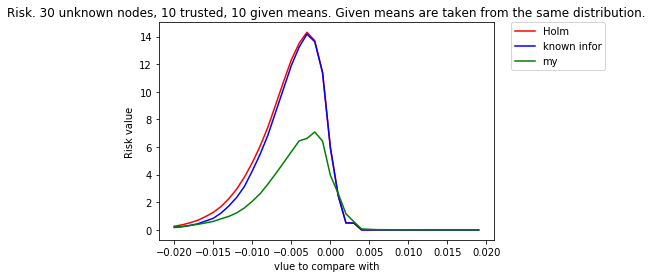

In [26]:
n = 1000 # число генераций
alpha = 0.05
m0s = np.arange(-0.02, 0.02, 0.001)
m1s = []
m2s = []
risks = []
knownMRisks = []
myRisks = []
for m0 in tqdm(m0s):
    s1 = s2 = 0
    knownMSum = 0
    mySum = 0
    trueMask = trueNet(returns_df, m0)
    for i in range(n):
        samples = np.random.multivariate_normal(returns_df.mean(), returns_df.cov(), 60)
        samplesDF = pd.DataFrame(samples)
        samplesDF.columns = returns_df.columns
        m1, m2 = cmpStruct(trueMask[0:30], holm(samplesDF, m0, alpha, returns_df.cov())[0:30])
        s1+=m1*0.5
        s2+=m2*0.5
        km1, km2 = cmpStruct(trueMask[0:30], knownInfo(samplesDF.mean(), range(0,30), returns_df.mean(), range(30,40), m0, alpha, returns_df.cov(), len(samplesDF.index)))
        knownMSum+=km1*0.5 + km2*0.5
        
        givenMeans = np.random.multivariate_normal(samplesDF.mean(), samplesDF.cov(), 1)[0]
        
        my1, my2 = cmpStruct(trueMask[0:50:3], 
my(samplesDF, range(0,30), returns_df.mean(), range(30,40), givenMeans, m0, alpha, alpha, returns_df.cov()))
        mySum+=my1*0.5 + my2*0.5
        
    s1/=n
    s2/=n
    m1s.append(s1)
    m2s.append(s2)
    risks.append(s1 + s2)
    knownMRisks.append(knownMSum/n)
    myRisks.append(mySum/n)
    
plt.title('Risk. 30 unknown nodes, 10 trusted, 10 given means. Given means are taken from the same distribution.')
plt.plot(m0s, risks, 'r', label = "Holm")
plt.plot(m0s, knownMRisks, 'b', label = "known infor")
plt.xlabel('vlue to compare with')
plt.ylabel('Risk value')
plt.plot(m0s, myRisks, 'g', label = "my")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

100%|██████████| 40/40 [36:59<00:00, 55.50s/it]


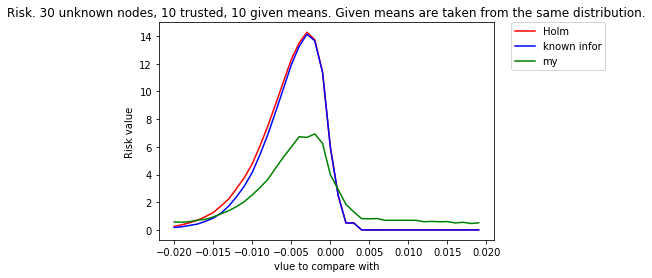

In [27]:
n = 1000 # число генераций
alpha = 0.05
m0s = np.arange(-0.02, 0.02, 0.001)
m1s = []
m2s = []
risks = []
knownMRisks = []
myRisks = []
for m0 in tqdm(m0s):
    s1 = s2 = 0
    knownMSum = 0
    mySum = 0
    trueMask = trueNet(returns_df, m0)
    for i in range(n):
        samples = np.random.multivariate_normal(returns_df.mean(), returns_df.cov(), 60)
        samplesDF = pd.DataFrame(samples)
        samplesDF.columns = returns_df.columns
        m1, m2 = cmpStruct(trueMask[0:30], holm(samplesDF, m0, alpha, returns_df.cov())[0:30])
        s1+=m1*0.5
        s2+=m2*0.5
        km1, km2 = cmpStruct(trueMask[0:30], knownInfo(samplesDF.mean(), range(0,30), returns_df.mean(), range(30,40), m0, alpha, returns_df.cov(), len(samplesDF.index)))
        knownMSum+=km1*0.5 + km2*0.5
        
        givenMeans = np.random.multivariate_normal(samplesDF.mean(), samplesDF.cov()*100, 1)[0]
        
        my1, my2 = cmpStruct(trueMask[0:50:3], 
my(samplesDF, range(0,30), returns_df.mean(), range(30,40), givenMeans, m0, alpha, alpha, returns_df.cov()))
        mySum+=my1*0.5 + my2*0.5
        
    s1/=n
    s2/=n
    m1s.append(s1)
    m2s.append(s2)
    risks.append(s1 + s2)
    knownMRisks.append(knownMSum/n)
    myRisks.append(mySum/n)
    
plt.title('Risk. 30 unknown nodes, 10 trusted, 10 given means. Given means are taken from the same distribution.')
plt.plot(m0s, risks, 'r', label = "Holm")
plt.plot(m0s, knownMRisks, 'b', label = "known infor")
plt.xlabel('vlue to compare with')
plt.ylabel('Risk value')
plt.plot(m0s, myRisks, 'g', label = "my")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)